In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
import datetime
warnings.filterwarnings('ignore')
warnings.warn('this will not show')
sns.set(style='darkgrid')
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
data = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/withoutNAN.pickle')

In [42]:
df=data.copy()

In [51]:
pd.set_option('display.max_columns', None)

In [52]:
df

,province,make,make_model,price,body_type,registration,vehicle_age,mileage,Gearbox,gears,seller,colour,power(kW),cylinders,drivetrain,type,full_service_history,fuel_type,combination(L/100Km),city(L/100Km),country(L/100Km),non_smoker_vehicle,empty_weight,co2_emissions,emission_class(Euro),seats,warranty_months,engine_size,upholstery_colour,doors,upholstery,Entertainment & Media,Comfort & Convenience,Safety,extras,general_inspection
0,North Brabant,Audi,Audi_A3,4450,Compact,2003,19,191066,Automatic,7,Dealer,Grey,110,4,Front,Used,Yes,Gasoline,5,6,4,No,1280,119,4,5,6,1984,Black,3,Cloth,"CD player, Radio","Air conditioning, Armrest, Automatic climate c...","[['ABS', 'Alarm system', 'Central door lock', ...",Alloy wheels,True
1,Limburg,Audi,Audi_A3,12950,Compact,2013,9,94758,Automatic,7,Dealer,White,92,4,Front,Used,Yes,Gasoline,4,6,4,No,1200,119,5,5,0,1395,Black,5,Cloth,"CD player, Radio","Air conditioning, Automatic climate control, E...","[['Alarm system', 'Central door lock', 'Centra...",Alloy wheels,False
2,North Brabant,Audi,Audi_A3,12445,Compact,2013,9,160883,Automatic,7,Dealer,Black,90,4,Front,Used,No,Gasoline,5,6,4,No,1200,116,5,5,0,1395,Black,5,Cloth,"Bluetooth, CD player, Hands-free equipment, MP...","Air conditioning, Armrest, Cruise control, Ele...","[['ABS', 'Central door lock', 'Central door lo...","Alloy wheels,Spoiler",True
3,North Brabant,Audi,Audi_A1,12450,Compact,2015,7,145102,Automatic,7,Dealer,Grey,92,4,Front,Used,Yes,Gasoline,5,6,4,Yes,1085,118,6,5,6,1395,Black,5,Part leather,"Bluetooth, CD player, On-board computer, USB","Air conditioning, Armrest, Automatic climate c...","[['ABS', 'Central door lock with remote contro...",Alloy wheels,True
4,Gelderland,Audi,Audi_A1,14945,Compact,2015,7,119666,Automatic,7,Dealer,Black,92,4,Front,Used,Yes,Gasoline,4,5,4,No,1105,111,6,4,6,1395,Black,3,Part leather,"CD player, MP3, On-board computer, Radio","Air conditioning, Armrest, Automatic climate c...","[['ABS', 'Alarm system', 'Bi-Xenon headlights'...","Alloy wheels,Shift paddles,Sport seats,Sport s...",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69506,South Holland,Volvo,Volvo_S60,1999,Sedan,2005,17,442713,Manual,5,Dealer,Blue,103,5,Front,Used,Yes,LPG,9,13,7,No,1441,225,4,5,0,2435,Beige,4,Part leather,"CD player, On-board computer, Radio","Air conditioning, Automatic climate control, C...","[['ABS', 'Central door lock', 'Central door lo...",Alloy wheels,True
69507,Friesland,Volvo,Volvo_S60,3950,Sedan,2005,17,251723,Manual,5,Dealer,Blue,103,5,Front,Used,No,CNG,8,12,6,No,1489,159,4,5,0,2435,Beige,4,Full leather,Radio,"Air conditioning, Automatic climate control, C...","[['ABS', 'Alarm system', 'Central door lock', ...",Alloy wheels,True
69508,Flevoland,Volvo,Volvo_S60,3449,Sedan,2004,18,340257,Manual,5,Dealer,Black,132,5,Front,Used,Yes,LPG,9,12,7,No,1495,215,3,5,0,1984,Beige,4,Part leather,On-board computer,"Air conditioning, Armrest, Automatic climate c...","[['ABS', 'Central door lock', 'Central door lo...","Alloy wheels,Automatically dimming interior mi...",True
69509,North Holland,Volvo,Volvo_S40,1650,Sedan,2004,18,399990,Manual,5,Private seller,Beige,103,5,Front,Used,No,LPG,8,12,6,No,1290,199,4,5,0,2435,Beige,4,Velour,"CD player, On-board computer, Radio","Air conditioning, Armrest, Automatic climate c...","[['ABS', 'Central door lock with remote contro...","Alloy wheels,Automatically dimming interior mi...",False


In [44]:
# Class5-Data_Visualization-Module-Week24

## This is the continuation of the homework autoscout project
## Generate graphs using the methods of the seaborn and matplotlib libraries to the questions below
"""
- 1-Top 20 most advertised car models
- 2-Frequencies of the number of vehicle advertisements placed in the advertisement according to the gear type
- 3-Frequencies of the number of vehicle advertisements placed in the advertisement according to the fuel type
- 4-Graph of average prices by brand.
- 5-Graph of mileage averages by law
- 6-CO2 emission graph by fuel type
- 7-age+price index
- 8-car chart posted by state
- 9-average fuel consumption by brands
- 10-HP average by brand
- 11-vehicle weight chart by brand
"""

'\n- 1-Top 20 most advertised car models\n- 2-Frequencies of the number of vehicle advertisements placed in the advertisement according to the gear type\n- 3-Frequencies of the number of vehicle advertisements placed in the advertisement according to the fuel type\n- 4-Graph of average prices by brand.\n- 5-Graph of mileage averages by law\n- 6-CO2 emission graph by fuel type\n- 7-age+price index\n- 8-car chart posted by state\n- 9-average fuel consumption by brands\n- 10-HP average by brand\n- 11-vehicle weight chart by brand\n'

In [45]:
make_values = pd.DataFrame(df.make.value_counts())
make_values.reset_index(inplace = True)

In [46]:
make_values.rename(columns = {'index' :'make','make':'counts'} , inplace = True )

In [47]:
make_values

,make,counts
0,BMW,7647
1,Volkswagen,7193
2,Mercedes-Benz,6547
3,Audi,6244
4,Volvo,5168
5,Renault,4732
6,Ford,4469
7,Peugeot,3885
8,Toyota,3081
9,Skoda,2857


Text(0.5, 1.0, 'The most cars')

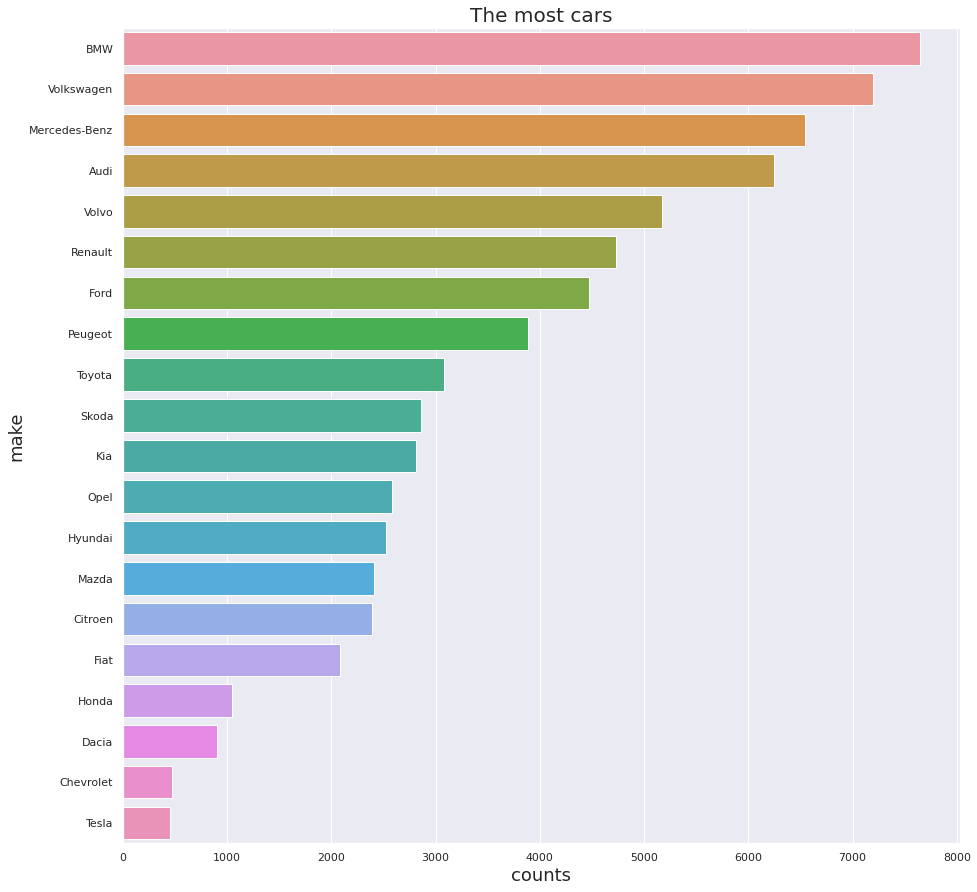

In [48]:
plt.figure(figsize = (15,15))
sns.barplot(y="make",x='counts' ,data=make_values)
plt.xlabel("frequency", fontsize=18)
plt.ylabel("make", fontsize=18)
plt.title("The most cars", fontsize=20)

Text(0.5, 1.0, 'Frequency of vehicle geartype')

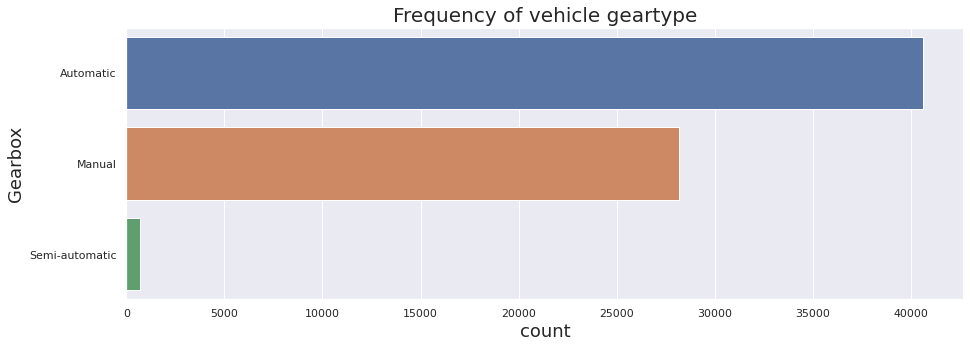

In [50]:
plt.figure(figsize = (15,5))
sns.barplot(y=df.Gearbox.value_counts().index,x=df.Gearbox.value_counts().values ,data = df)
plt.xlabel("frequency", fontsize=18)
plt.ylabel("Gearbox", fontsize=18)
plt.title("Frequency of vehicle geartype", fontsize=20)

In [54]:
df.fuel_type.value_counts()

Gasoline             40759
Diesel               13043
Electric/Gasoline     9164
Electric              5477
LPG                    597
Electric/Diesel        277
CNG                    107
Hydrogen                67
Ethanol                 12
Others                   8
Name: fuel_type, dtype: int64

Text(0.5, 1.0, 'Frequency of vehicle geartype')

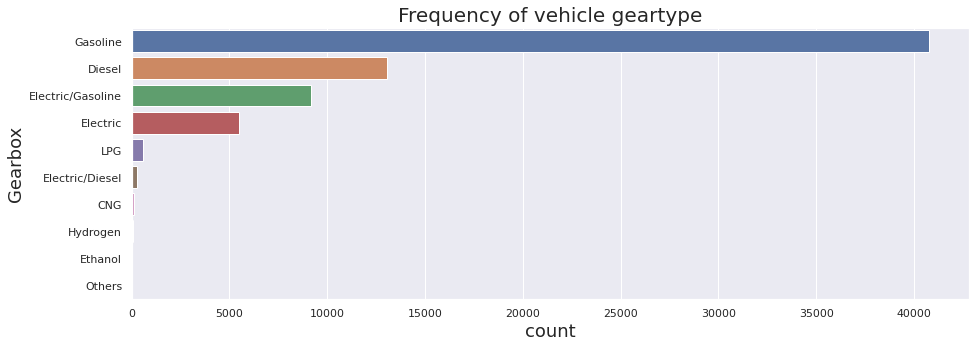

In [53]:
plt.figure(figsize = (15,5))
sns.barplot(y=df.fuel_type.value_counts().index,x=df.fuel_type.value_counts().values ,data = df)
plt.xlabel("frequency", fontsize=18)
plt.ylabel("fuel_type", fontsize=18)
plt.title("Frequency of vehicle fuel type", fontsize=20)

In [62]:
df.groupby('make').price.mean().sort_values()

make
Chevrolet        13002.324786
Dacia            13501.014317
Fiat             13980.153365
Peugeot          14835.276448
Renault          15283.004015
Citroen          15366.702296
Opel             16937.788231
Toyota           17726.821487
Mazda            18140.790717
Honda            19509.805133
Volkswagen       19755.205756
Kia              21549.573613
Hyundai          21573.588492
Ford             22632.680242
Skoda            23311.967448
Volvo            23859.755611
BMW              27912.491173
Mercedes-Benz    28937.406751
Audi             33727.504164
Tesla            58657.411379
Name: price, dtype: float64

Text(0.5, 1.0, 'Average Price by brand')

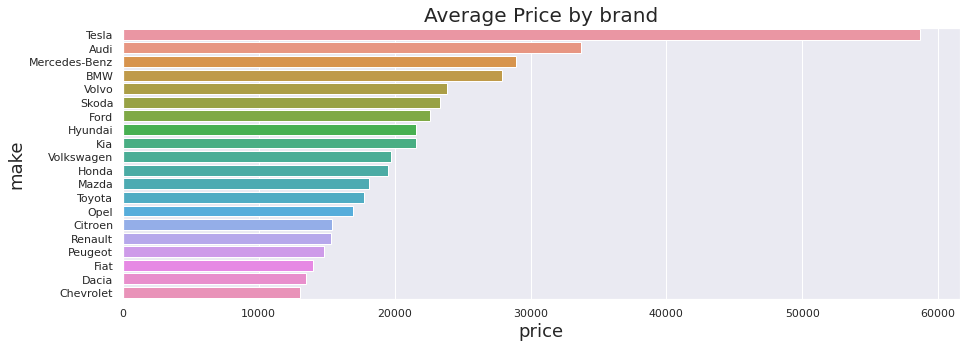

In [66]:
plt.figure(figsize = (15,5))
sns.barplot(y=df.groupby('make').price.mean().sort_values(ascending=False).index,x=df.groupby('make').price.mean().sort_values(ascending=False).values ,data = df)
plt.xlabel("price", fontsize=18)
plt.ylabel("make", fontsize=18)
plt.title("Average Price by brand", fontsize=20)

Text(0.5, 1.0, 'Average mileage by law(province)')

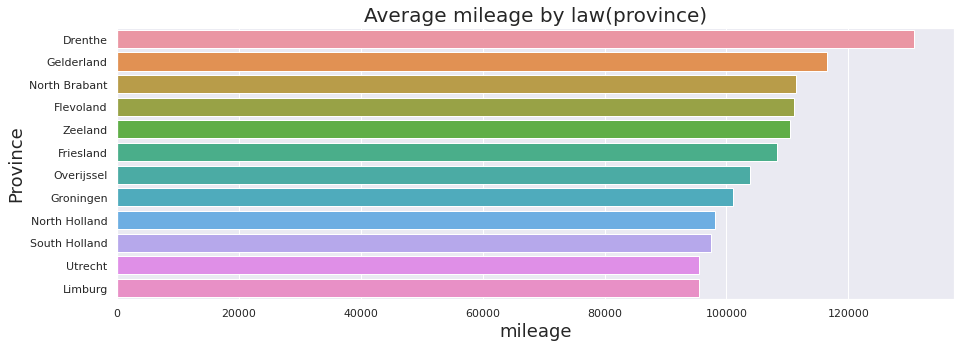

In [68]:
plt.figure(figsize = (15,5))
sns.barplot(y=df.groupby('province').mileage.mean().sort_values(ascending=False).index,x=df.groupby('province').mileage.mean().sort_values(ascending=False).values ,data = df)
plt.xlabel("mileage", fontsize=18)
plt.ylabel("Province", fontsize=18)
plt.title("Average mileage by law(province)", fontsize=20)

Text(0.5, 1.0, 'Average co2 emission by fuel_type')

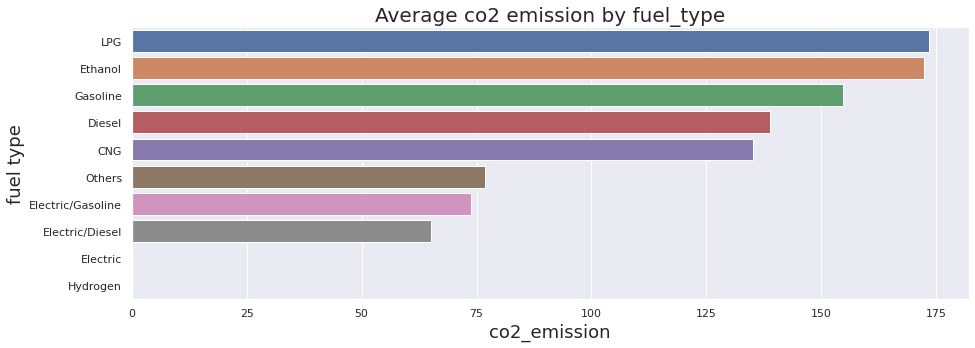

In [70]:
plt.figure(figsize = (15,5))
sns.barplot(y=df.groupby('fuel_type').co2_emissions.mean().sort_values(ascending=False).index,x=df.groupby('fuel_type').co2_emissions.mean().sort_values(ascending=False).values ,data = df)
plt.xlabel("co2_emission", fontsize=18)
plt.ylabel("fuel type", fontsize=18)
plt.title("Average co2 emission by fuel_type", fontsize=20)

Text(0.5, 1.0, 'age+price index')

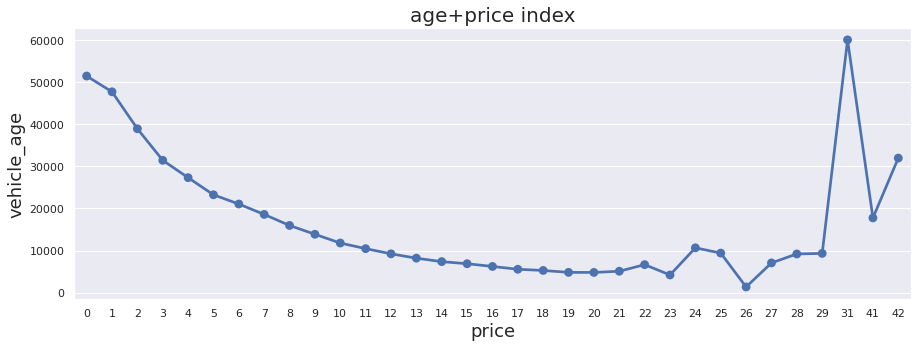

In [79]:
plt.figure(figsize = (15,5))
sns.pointplot(x=df.groupby('vehicle_age').price.mean().sort_values(ascending=False).index,y=df.groupby('vehicle_age').price.mean().sort_values(ascending=False).values ,data = df)
plt.xlabel("price", fontsize=18)
plt.ylabel("vehicle_age", fontsize=18)
plt.title("age+price index", fontsize=20)

In [75]:
df[df.vehicle_age == 31] 

,province,make,make_model,price,body_type,registration,vehicle_age,mileage,Gearbox,gears,seller,colour,power(kW),cylinders,drivetrain,type,full_service_history,fuel_type,combination(L/100Km),city(L/100Km),country(L/100Km),non_smoker_vehicle,empty_weight,co2_emissions,emission_class(Euro),seats,warranty_months,engine_size,upholstery_colour,doors,upholstery,Entertainment & Media,Comfort & Convenience,Safety,extras,general_inspection
45510,Gelderland,Honda,Honda_Others,60000,Coupe,1991,31,150000,Manual,6,Private seller,White,206,6,Front,Used,No,Gasoline,12,17,9,No,1445,291,6,2,0,3179,Red,2,Cloth,"Radio, Sound system","Air conditioning, Automatic climate control, C...","[['ABS', 'Alarm system', 'Central door lock', ...",Alloy wheels,False


Text(0.5, 1.0, 'frequency of cars by province')

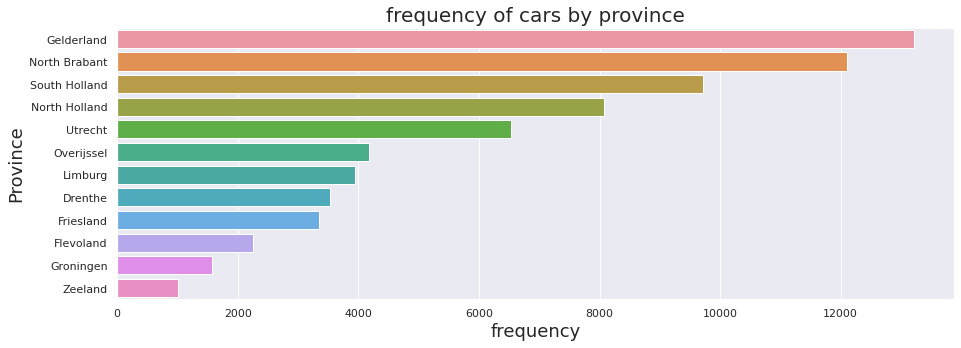

In [85]:
plt.figure(figsize = (15,5))
sns.barplot(y=df.province.value_counts().sort_values(ascending=False).index,x=df.province.value_counts().sort_values(ascending=False).values ,data = df)
plt.xlabel("frequency", fontsize=18)
plt.ylabel("Province", fontsize=18)
plt.title("frequency of cars by province", fontsize=20)

Text(0.5, 1.0, 'average of vehicle fuel consumption')

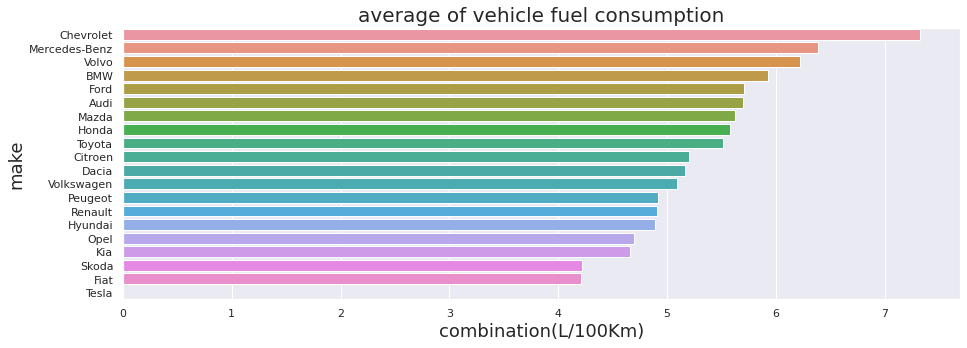

In [90]:
plt.figure(figsize = (15,5))
sns.barplot(y=df.groupby('make')['combination(L/100Km)'].mean().sort_values(ascending=False).index,x=df.groupby('make')['combination(L/100Km)'].mean().sort_values(ascending=False).values ,data = df)
plt.xlabel("combination(L/100Km)", fontsize=18)
plt.ylabel("make", fontsize=18)
plt.title("average of vehicle fuel consumption", fontsize=20)





Text(0.5, 1.0, 'average power of vehicle brands')

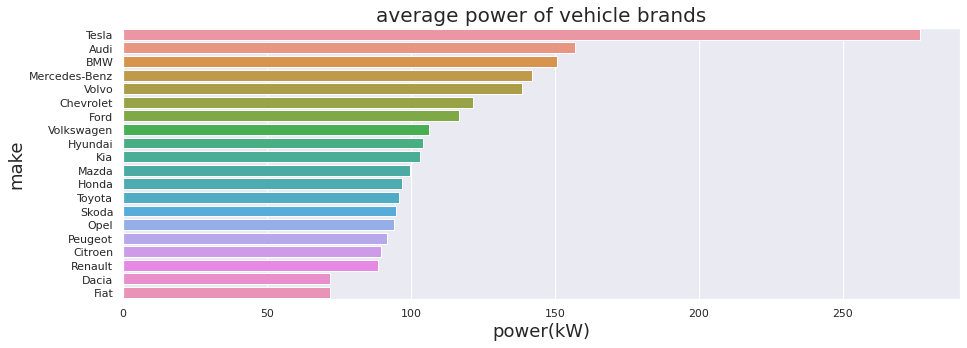

In [98]:
plt.figure(figsize = (15,5))
sns.barplot(y=df.groupby('make')['power(kW)'].mean().sort_values(ascending=False).index,x=df.groupby('make')['power(kW)'].mean().sort_values(ascending=False).values ,data = df)
plt.xlabel("power(kW)", fontsize=18)
plt.ylabel("make", fontsize=18)
plt.title("average power of vehicle brands", fontsize=20)





Text(0.5, 1.0, 'average weight of vehicle brands')

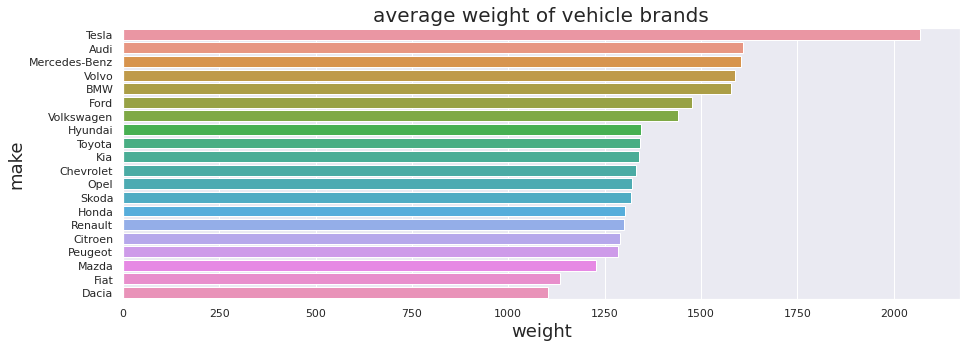

In [100]:

plt.figure(figsize = (15,5))
sns.barplot(y=df.groupby('make').empty_weight.mean().sort_values(ascending=False).index,x=df.groupby('make').empty_weight.mean().sort_values(ascending=False).values ,data = df)
plt.xlabel("weight", fontsize=18)
plt.ylabel("make", fontsize=18)
plt.title("average weight of vehicle brands", fontsize=20)



